In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from imgaug import augmenters as iaa
import cv2
import pandas as pd
import ntpath
import random
import warnings
from skimage.transform import resize
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Model
warnings.filterwarnings("ignore")


In [2]:
!unzip "/content/drive/MyDrive/Dataset/archive (2).zip"

Streaming output truncated to the last 5000 lines.
  inflating: self_driving_car_dataset_make/IMG/left_2022_04_10_12_28_01_063.jpg  
  inflating: self_driving_car_dataset_make/IMG/left_2022_04_10_12_28_01_132.jpg  
  inflating: self_driving_car_dataset_make/IMG/left_2022_04_10_12_28_01_203.jpg  
  inflating: self_driving_car_dataset_make/IMG/left_2022_04_10_12_28_01_273.jpg  
  inflating: self_driving_car_dataset_make/IMG/left_2022_04_10_12_28_01_341.jpg  
  inflating: self_driving_car_dataset_make/IMG/left_2022_04_10_12_28_01_409.jpg  
  inflating: self_driving_car_dataset_make/IMG/left_2022_04_10_12_28_01_483.jpg  
  inflating: self_driving_car_dataset_make/IMG/left_2022_04_10_12_28_01_554.jpg  
  inflating: self_driving_car_dataset_make/IMG/left_2022_04_10_12_28_01_623.jpg  
  inflating: self_driving_car_dataset_make/IMG/left_2022_04_10_12_28_01_692.jpg  
  inflating: self_driving_car_dataset_make/IMG/left_2022_04_10_12_28_01_765.jpg  
  inflating: self_driving_car_dataset_make/IMG/

In [2]:
jungle="/content/self_driving_car_dataset_jungle/IMG"
make="/content/self_driving_car_dataset_make"

In [3]:
jungle_csv_path="/content/self_driving_car_dataset_jungle/driving_log.csv"
make_csv_path ="/content/self_driving_car_dataset_make/driving_log.csv"

In [4]:
import pandas as pd
# Read the CSV file without specifying headers
data = pd.read_csv(make_csv_path,names=['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed'])
pd.set_option('display.max_colwidth', -1)
(data.head())


center  \
0  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\center_2022_04_10_12_24_41_840.jpg   
1  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\center_2022_04_10_12_24_41_908.jpg   
2  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\center_2022_04_10_12_24_41_976.jpg   
3  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\center_2022_04_10_12_24_42_044.jpg   
4  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\center_2022_04_10_12_24_42_116.jpg   

                                                                                  left  \
0  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\left_2022_04_10_12_24_41_840.jpg   
1  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\left_2022_04_10_12_24_41_908.jpg   
2  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\left_2022_04_10_12_24_41_976.jpg   
3  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\left_2022_04_10_12_24_42_044.jpg   
4  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\left_2022_04_10_12_24_42_116.jpg   

                                                                                  right  \
0  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\right_2022_04_10_12_24_41_840.jpg   
1  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\right_2022_04_10_12_24_41_908.jpg   
2  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\right_2022_04_10_12_24_41_976.jpg   
3  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\right_2022_04_10_12_24_42_044.jpg   
4  C:\Users\Andy\Desktop\self_driving_car_dataset\IMG\right_2022_04_10_12_24_42_116.jpg   

   steering  throttle  reverse     speed  
0  0.0       0.0       0        0.000013  
1  0.0       0.0       0        0.000010  
2  0.0       0.0       0        0.000008  
3  0.0       0.0       0        0.000021  
4  0.0       0.0       0        0.000014

In [5]:
def path_leaf(path):
  head, tail = ntpath.split(path)
  return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

center                              left  \
0  center_2022_04_10_12_24_41_840.jpg  left_2022_04_10_12_24_41_840.jpg   
1  center_2022_04_10_12_24_41_908.jpg  left_2022_04_10_12_24_41_908.jpg   
2  center_2022_04_10_12_24_41_976.jpg  left_2022_04_10_12_24_41_976.jpg   
3  center_2022_04_10_12_24_42_044.jpg  left_2022_04_10_12_24_42_044.jpg   
4  center_2022_04_10_12_24_42_116.jpg  left_2022_04_10_12_24_42_116.jpg   

                               right  steering  throttle  reverse     speed  
0  right_2022_04_10_12_24_41_840.jpg  0.0       0.0       0        0.000013  
1  right_2022_04_10_12_24_41_908.jpg  0.0       0.0       0        0.000010  
2  right_2022_04_10_12_24_41_976.jpg  0.0       0.0       0        0.000008  
3  right_2022_04_10_12_24_42_044.jpg  0.0       0.0       0        0.000021  
4  right_2022_04_10_12_24_42_116.jpg  0.0       0.0       0        0.000014

In [6]:
num_bins = 25
samples_per_bin = 400
hist, bins = np.histogram(data['steering'], num_bins)
print('total data:', len(data))

total data: 3930


In [7]:
remove_list = []
for j in range(num_bins):
  list_ = []
  for i in range(len(data['steering'])):
    if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
      list_.append(i)
  list_ = shuffle(list_)
  list_ = list_[samples_per_bin:]
  remove_list.extend(list_)
print('removed:', len(remove_list))

removed: 2661


In [8]:
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

remaining: 1269


In [9]:
def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(df)):
        indexed_data = df.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
        # left image append
        image_path.append(os.path.join(datadir, left.strip()))
        steering.append(float(indexed_data[3]) + 0.15)
        # right image append
        image_path.append(os.path.join(datadir, right.strip()))
        steering.append(float(indexed_data[3]) - 0.15)
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

# Assuming `datadir` is defined earlier
image_paths, steerings = load_img_steering(make + '/IMG', data)

In [15]:
image_paths

array(['/content/self_driving_car_dataset_make/IMG/center_2022_04_10_12_24_42_044.jpg',
       '/content/self_driving_car_dataset_make/IMG/left_2022_04_10_12_24_42_044.jpg',
       '/content/self_driving_car_dataset_make/IMG/right_2022_04_10_12_24_42_044.jpg',
       ...,
       '/content/self_driving_car_dataset_make/IMG/center_2022_04_10_12_29_14_841.jpg',
       '/content/self_driving_car_dataset_make/IMG/left_2022_04_10_12_29_14_841.jpg',
       '/content/self_driving_car_dataset_make/IMG/right_2022_04_10_12_29_14_841.jpg'],
      dtype='<U77')

In [10]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)

# Printing the number of training and validation samples
print('Training Samples:', len(X_train))
print('Validation Samples:', len(X_valid))


Training Samples: 3045
Validation Samples: 762


Text(0.5, 1.0, 'Validation set')

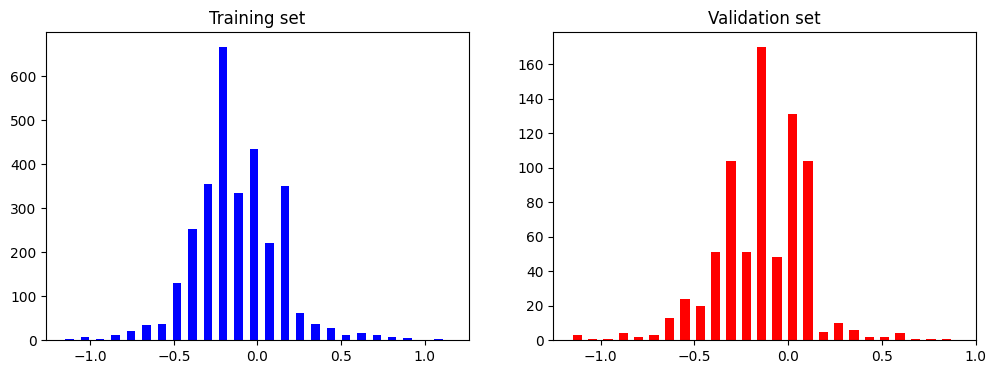

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins=num_bins, width=0.05, color='blue')
axes[0].set_title('Training set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')

Text(0.5, 1.0, 'Zoomed Image')

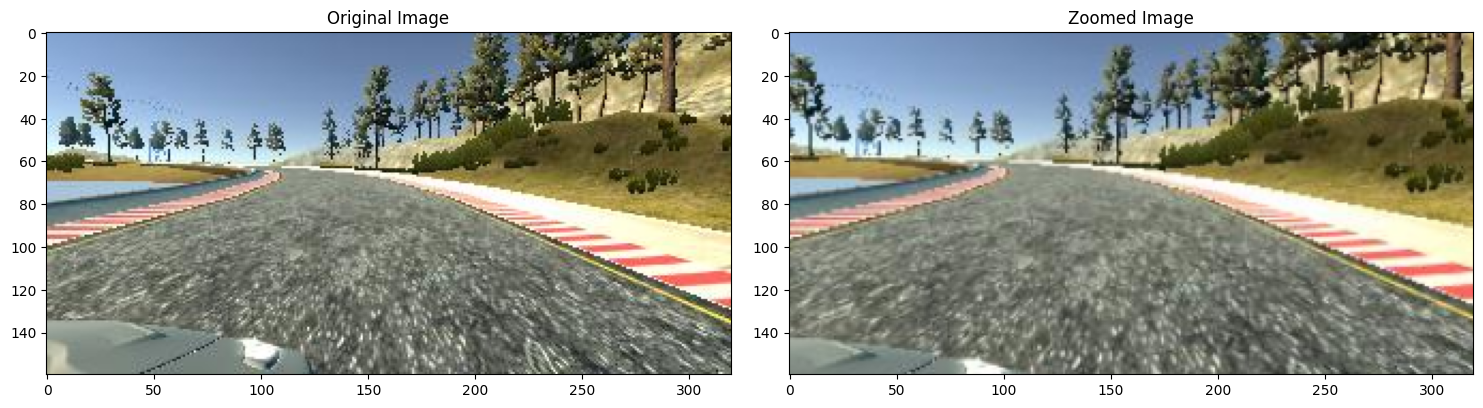

In [12]:
def zoom(image):
  zoom = iaa.Affine(scale=(1, 1.3))
  image = zoom.augment_image(image)
  return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
zoomed_image = zoom(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(zoomed_image)
axs[1].set_title('Zoomed Image')

Text(0.5, 1.0, 'Panned Image')

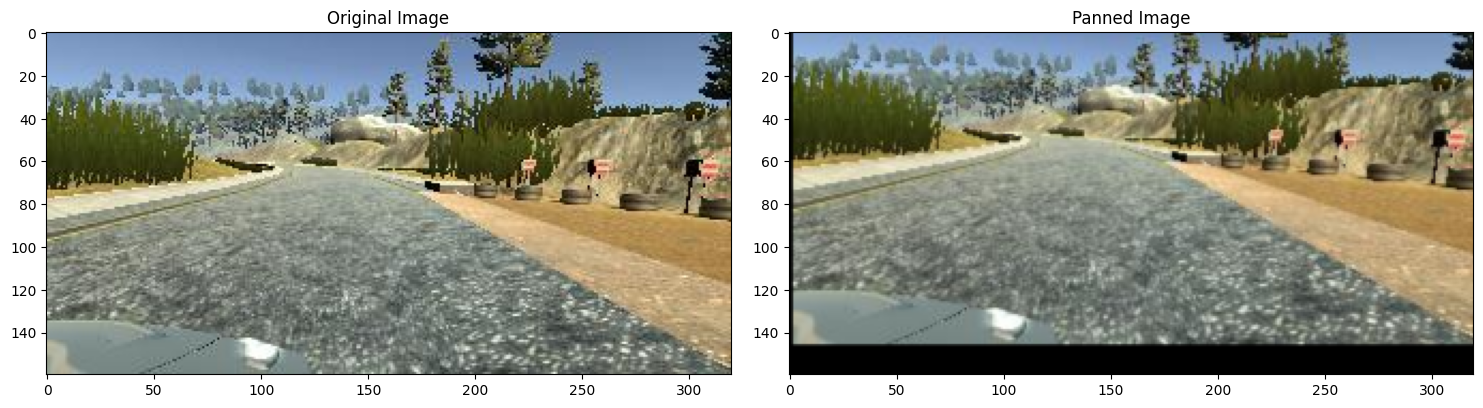

In [13]:
def pan(image):
  pan = iaa.Affine(translate_percent= {"x" : (-0.1, 0.1), "y": (-0.1, 0.1)})
  image = pan.augment_image(image)
  return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
panned_image = pan(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(panned_image)
axs[1].set_title('Panned Image')


Text(0.5, 1.0, 'Brightness altered image ')

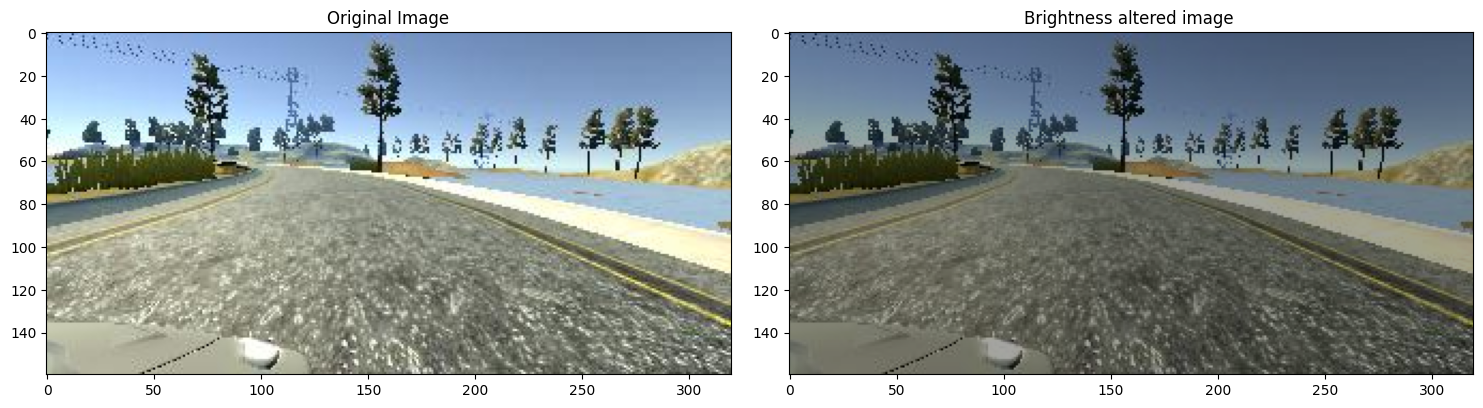

In [19]:
def img_random_brightness(image):
    brightness = iaa.Multiply((0.2, 1.2))
    image = brightness.augment_image(image)
    return image
image = image_paths[random.randint(0, 1000)]
original_image = mpimg.imread(image)
brightness_altered_image = img_random_brightness(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image')

axs[1].imshow(brightness_altered_image)
axs[1].set_title('Brightness altered image ')

Text(0.5, 1.0, 'Flipped Image - Steering Angle:0.4')

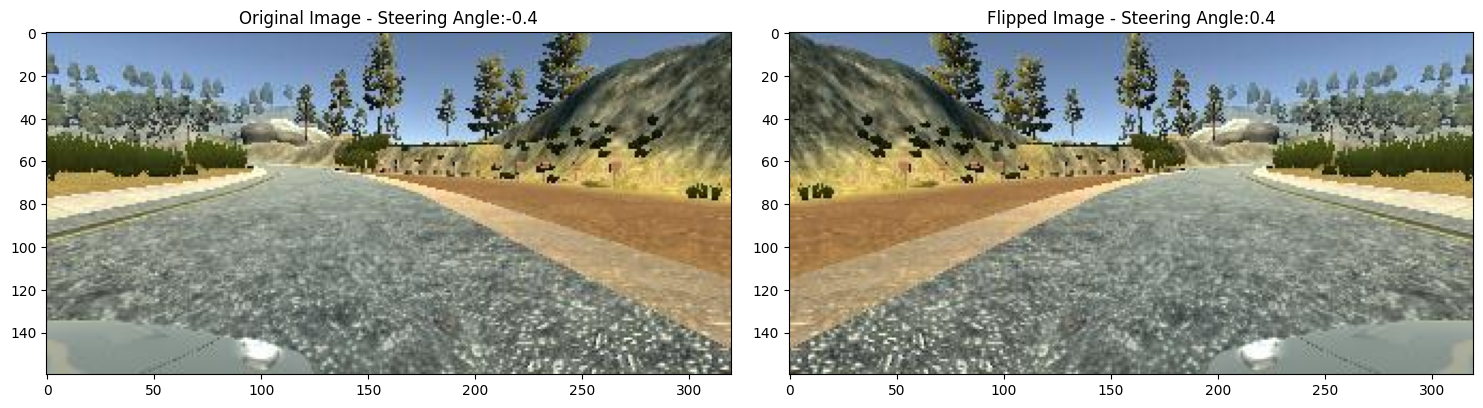

In [20]:
def img_random_flip(image, steering_angle):
    image = cv2.flip(image,1)
    steering_angle = -steering_angle
    return image, steering_angle
random_index = random.randint(0, 1000)
image = image_paths[random_index]
steering_angle = steerings[random_index]


original_image = mpimg.imread(image)
flipped_image, flipped_steering_angle = img_random_flip(original_image, steering_angle)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(original_image)
axs[0].set_title('Original Image - ' + 'Steering Angle:' + str(steering_angle))

axs[1].imshow(flipped_image)
axs[1].set_title('Flipped Image - ' + 'Steering Angle:' + str(flipped_steering_angle))

In [21]:
def random_augment(image, steering_angle):
    image = mpimg.imread(image)
    if np.random.rand() < 0.5:
      image = pan(image)
    if np.random.rand() < 0.5:
      image = zoom(image)
    if np.random.rand() < 0.5:
      image = img_random_brightness(image)
    if np.random.rand() < 0.5:
      image, steering_angle = img_random_flip(image, steering_angle)

    return image, steering_angle
ncol = 2
nrow = 10

fig, axs = plt.subplots(nrow, ncol, figsize=(15, 50))
fig.tight_layout()

for i in range(10):
  randnum = random.randint(0, len(image_paths) - 1)
  random_image = image_paths[randnum]
  random_steering = steerings[randnum]
  original_image = mpimg.imread(random_image)
  augmented_image, steering = random_augment(random_image, random_steering)

  axs[i][0].imshow(original_image)
  axs[i][0].set_title("Original Image")

  axs[i][1].imshow(augmented_image)
  axs[i][1].set_title("Augmented Image")

Output hidden; open in https://colab.research.google.com to view.

(160, 320, 3)

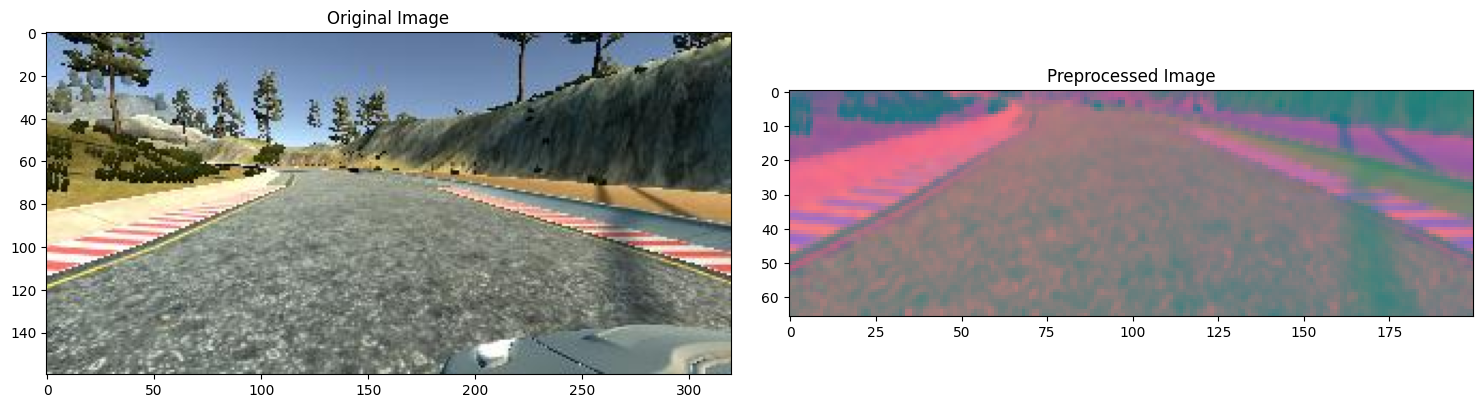

In [14]:
def img_preprocess(img):
    img = img[60:135,:,:]
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img,  (3, 3), 0)
    img = cv2.resize(img, (200, 66))
    img = img/255
    return img
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')
original_image.shape

Text(0.5, 1.0, 'Preprocessed Image')

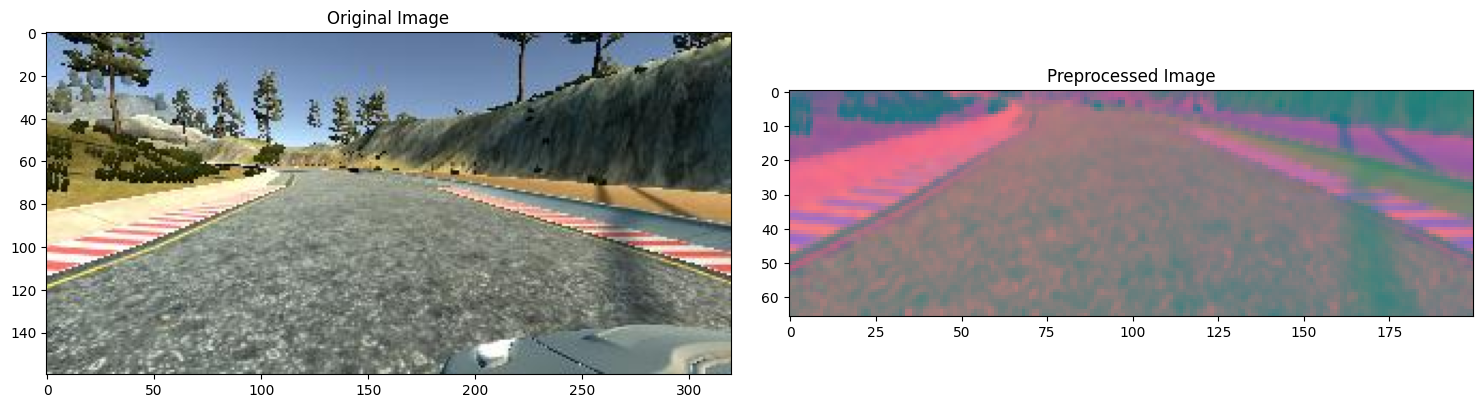

In [15]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(original_image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('Preprocessed Image')

In [16]:
def batch_generator(image_paths, steering_ang, batch_size, istraining):

    while True:
        batch_img = []
        batch_steering = []

        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)

            if istraining:
                im, steering = random_augment(image_paths[random_index], steering_ang[random_index])

            else:
                im = mpimg.imread(image_paths[random_index])
                steering = steering_ang[random_index]

            im = img_preprocess(im)
            batch_img.append(im)
            batch_steering.append(steering)

        yield (np.asarray(batch_img), np.asarray(batch_steering))

Text(0.5, 1.0, 'Validation Image')

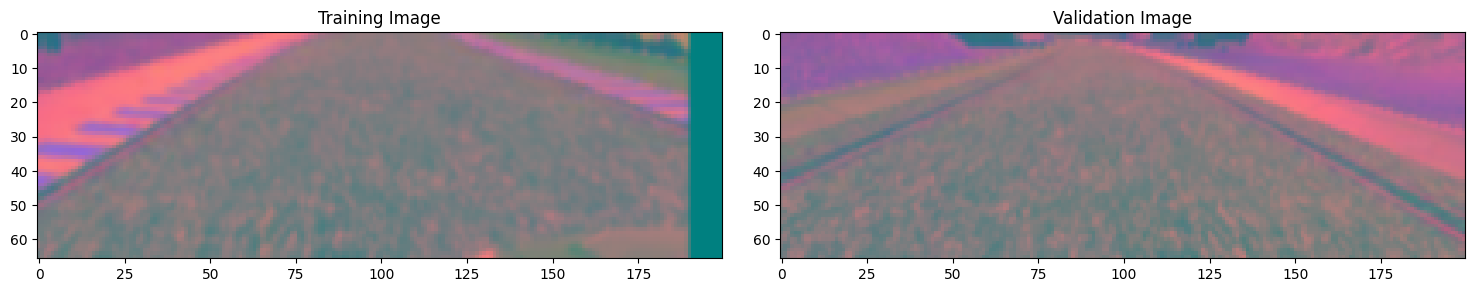

In [22]:
x_train_gen, y_train_gen = next(batch_generator(X_train, y_train, 1, 1))
x_valid_gen, y_valid_gen = next(batch_generator(X_valid, y_valid, 1, 0))

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()

axs[0].imshow(x_train_gen[0])
axs[0].set_title('Training Image')

axs[1].imshow(x_valid_gen[0])
axs[1].set_title('Validation Image')

In [25]:

image_dimensions = X_train.shape
print("Image dimensions:", image_dimensions)


Image dimensions: (3045,)


In [31]:
from tensorflow.keras.layers import Input, Conv2D, Flatten, Dense
from tensorflow.keras.models import Model

def nvidia_model(input_shape=(66, 200, 3)):
    inputs = Input(shape=input_shape)



    # Convolutional layers
    conv1 = Conv2D(24, (5, 5), strides=(2, 2), activation='relu')(inputs)
    conv2 = Conv2D(36, (5, 5), strides=(2, 2), activation='relu')(conv1)
    conv3 = Conv2D(48, (5, 5), strides=(2, 2), activation='relu')(conv2)
    conv4 = Conv2D(64, (3, 3), activation='relu')(conv3)
    conv5 = Conv2D(64, (3, 3), activation='relu')(conv4)

    # Flatten layer
    flatten = Flatten()(conv5)

    # Fully connected layers
    dense1 = Dense(100, activation='relu')(flatten)
    dense2 = Dense(50, activation='relu')(dense1)
    dense3 = Dense(10, activation='relu')(dense2)

    # Output layer
    outputs = Dense(1, activation='linear')(dense3)  # Linear activation for regression

    model = Model(inputs=inputs, outputs=outputs)

    return model

# Instantiate the NVIDIA model
model = nvidia_model(input_shape=(66, 200, 3))

# Compile the model
model.compile(optimizer='adam', loss='mse')  # Using mean squared error loss for regression

# Print model summary
model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 66, 200, 3)]      0         
                                                                 
 conv2d_10 (Conv2D)          (None, 31, 98, 24)        1824      
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 47, 36)        21636     
                                                                 
 conv2d_12 (Conv2D)          (None, 5, 22, 48)         43248     
                                                                 
 conv2d_13 (Conv2D)          (None, 3, 20, 64)         27712     
                                                                 
 conv2d_14 (Conv2D)          (None, 1, 18, 64)         36928     
                                                                 
 flatten_2 (Flatten)         (None, 1152)              0   

In [32]:
history = model.fit_generator(batch_generator(X_train, y_train, batch_size=32, istraining=True),
                              steps_per_epoch=len(X_train) // 32,
                              epochs=20,
                              validation_data=batch_generator(X_valid, y_valid, batch_size=32, istraining=False),
                              validation_steps=len(X_valid) // 32,
                              verbose=1,
                              shuffle=True)


Epoch 1/20
95/95 [==============================] - 15s 137ms/step - loss: 0.0768 - val_loss: 0.0752
Epoch 2/20
95/95 [==============================] - 13s 133ms/step - loss: 0.0640 - val_loss: 0.0497
Epoch 3/20
95/95 [==============================] - 11s 112ms/step - loss: 0.0516 - val_loss: 0.0358
Epoch 4/20
95/95 [==============================] - 11s 119ms/step - loss: 0.0450 - val_loss: 0.0364
Epoch 5/20
95/95 [==============================] - 11s 119ms/step - loss: 0.0412 - val_loss: 0.0300
Epoch 6/20
95/95 [==============================] - 11s 118ms/step - loss: 0.0398 - val_loss: 0.0340
Epoch 7/20
95/95 [==============================] - 11s 114ms/step - loss: 0.0405 - val_loss: 0.0301
Epoch 8/20
95/95 [==============================] - 10s 109ms/step - loss: 0.0394 - val_loss: 0.0312
Epoch 9/20
95/95 [==============================] - 11s 118ms/step - loss: 0.0386 - val_loss: 0.0302
Epoch 10/20
95/95 [==============================] - 11s 116ms/step - loss: 0.0383 - val_lo

Text(0.5, 0, 'Epoch')

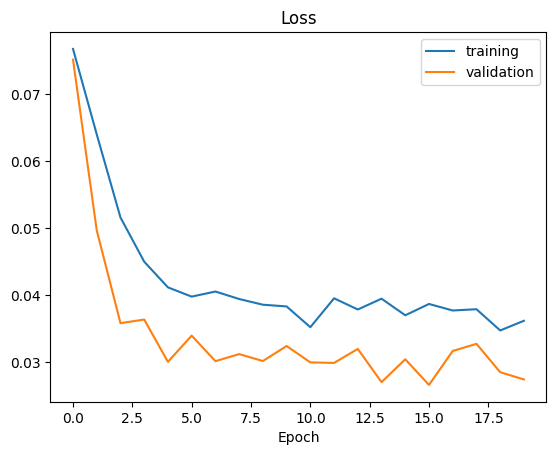

In [33]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'])
plt.title('Loss')
plt.xlabel('Epoch')

In [52]:
import cv2
import numpy as np

# Resize the input image to match the expected input shape of the model
s = cv2.resize(x_train_gen[0], (200, 66))

# Expand the dimensions to match the batch size (assuming batch size is 1)
s = np.expand_dims(s, axis=0)

# Make predictions
predicted_steering_angle = model.predict(s)

# Post-process the predictions if necessary
# For example, convert radians to degrees
predicted_steering_angle_degrees = predicted_steering_angle * (180 / np.pi)

# Visualize or use the predictions
print(f"Predicted Steering Angle: {predicted_steering_angle_degrees}")


1/1 [==============================] - 0s 19ms/step
Predicted Steering Angle: [[2.514648]]
